# SGD

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000
x = np.random.normal(size = m)
X= x.reshape(-1,1)
y = 4.* x + 3. + np.random.normal(0,3,size = m)

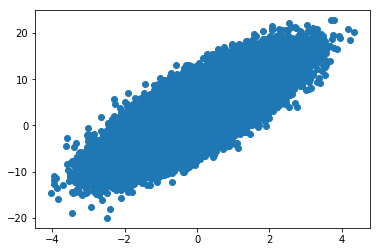

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
def J(theta,X_b,y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / (2 * len(y))
    except:
        return float('inf')
    
def dJ(theta,X_b,y):
    return X_b.T.dot(X_b.dot(theta) - y) / len(y)

def gradient_descent(X_b,y,init_theta,alpha ,n_iters = 1e6,epsilon = 1e-8):
    theta = init_theta
    i_iter = 0
    while i_iter < n_iters:
        d_theta = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - alpha * d_theta
        if(abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon):
            break
        i_iter += 1
    return theta
    

In [5]:
%%time
X_b = np.hstack([np.ones((len(X),1)),X])
init_theta = np.zeros(X_b.shape[1])
alpha = 0.01
theta = gradient_descent(X_b,y,init_theta,alpha)

Wall time: 3.78 s


In [6]:
theta

array([ 3.01586622,  3.99163812])

## SGD

In [7]:
def dJ_sgd(theta,X_bi,y_i):
    return X_bi.T.dot(X_bi.dot(theta) - y_i)

def sgd(X_b,y,init_theta,n_iters):
    t0,t1 = 5,50
    def learning_rate(t):
        return t0 /(t + t1)
    theta = init_theta
    for i_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        d_theta = dJ_sgd(theta,X_b[rand_i],y[rand_i])
        theta = theta - learning_rate(i_iter) * d_theta
        
    return theta

In [8]:
%%time
X_b = np.hstack([np.ones((len(X),1)),X])
init_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b,y,init_theta ,n_iters = m//3)

Wall time: 442 ms


In [9]:
theta

array([ 3.02969373,  4.00316302])